# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pylab import rcParams
import seaborn as sb
#np.set_printoptions(threshold=sys.maxsize)

## Importing the dataset

In [12]:
dataset = pd.read_csv('../figure/Plastic_fig.csv')
X = dataset.iloc[:, :4].values # first 4 column
y = dataset.iloc[:, -2].values # stress

In [14]:
dataset

Radius (A°)  Coil diameter (A°)  Pitch angle (deg)  Pitch length (A°)  \
0            8.23                6.99              30.64              30.65   
1            5.23                3.88              29.74              18.77   
2           10.64                8.20              22.15              27.20   
3           14.34                6.84              35.10              63.30   
4            8.79                9.00              33.01              35.89   
...           ...                 ...                ...                ...   
4206         3.83                4.94              46.20              25.12   
4207         1.73                3.00              67.36              26.11   
4208         3.96                3.44              42.55              22.87   
4209         2.94                2.73              52.63              24.23   
4210         1.45                1.77              70.03              25.11   

      Number of turns  Total length (A°)  Yield stress (GPa)  Failure strain  \
0                1.67              51.10                1.54            0.02   
1                1.34              25.12                1.95            0.03   
2                0.62              16.88                2.22            0.02   
3                0.80              50.82                1.53            0.02   
4                0.97              34.83                1.65            0.02   
...               ...                ...                 ...             ...   
4206             9.06             227.58               44.90            0.15   
4207             9.06             236.57               56.76            0.11   
4208             9.19             210.20               44.47            0.23   
4209             9.89             239.60               33.54            0.18   
4210            10.80             271.28               47.96            0.11   

      Toughness (GPa)  
0                0.00  
1                0.00  
2                0.00  
3                0.01  
4                0.01  
...               ...  
4206             2.79  
4207             3.54  
4208             2.97  
4209             3.13  
4210             3.31  

[4211 rows x 9 columns]

## Data Visualization

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

[]

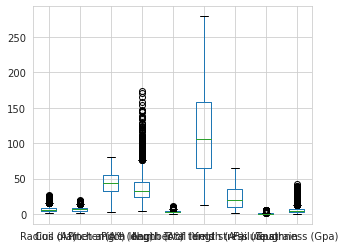

In [8]:
dataset.boxplot(return_type='dict')
plt.plot()

## Outlier Detection
A simple approach is eliminating data that are higher than 1.5*(75%-25%) + 75% or
less than 25% - 1.5*(75%-25%)


In [5]:
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(dataset)
print(X_df.describe())

       Radius (A°)  Coil diameter (A°)  Pitch angle (deg)  Pitch length (A°)  \
count      4211.00             4211.00            4211.00            4211.00   
mean          6.65                6.95              43.15              36.60   
std           4.12                3.13              15.21              18.48   
min           1.45                1.58               2.53               4.44   
25%           3.81                4.70              31.92              24.13   
50%           5.06                6.51              44.16              32.27   
75%           8.33                8.42              54.55              44.77   
max          26.38               19.15              80.22             173.73   

       Number of turns  Total length (A°)  Yield stress (GPa)  Failure strain  \
count          4211.00            4211.00             4211.00         4211.00   
mean              3.27             115.20               23.04            0.73   
std               1.59              

## Data Visualization

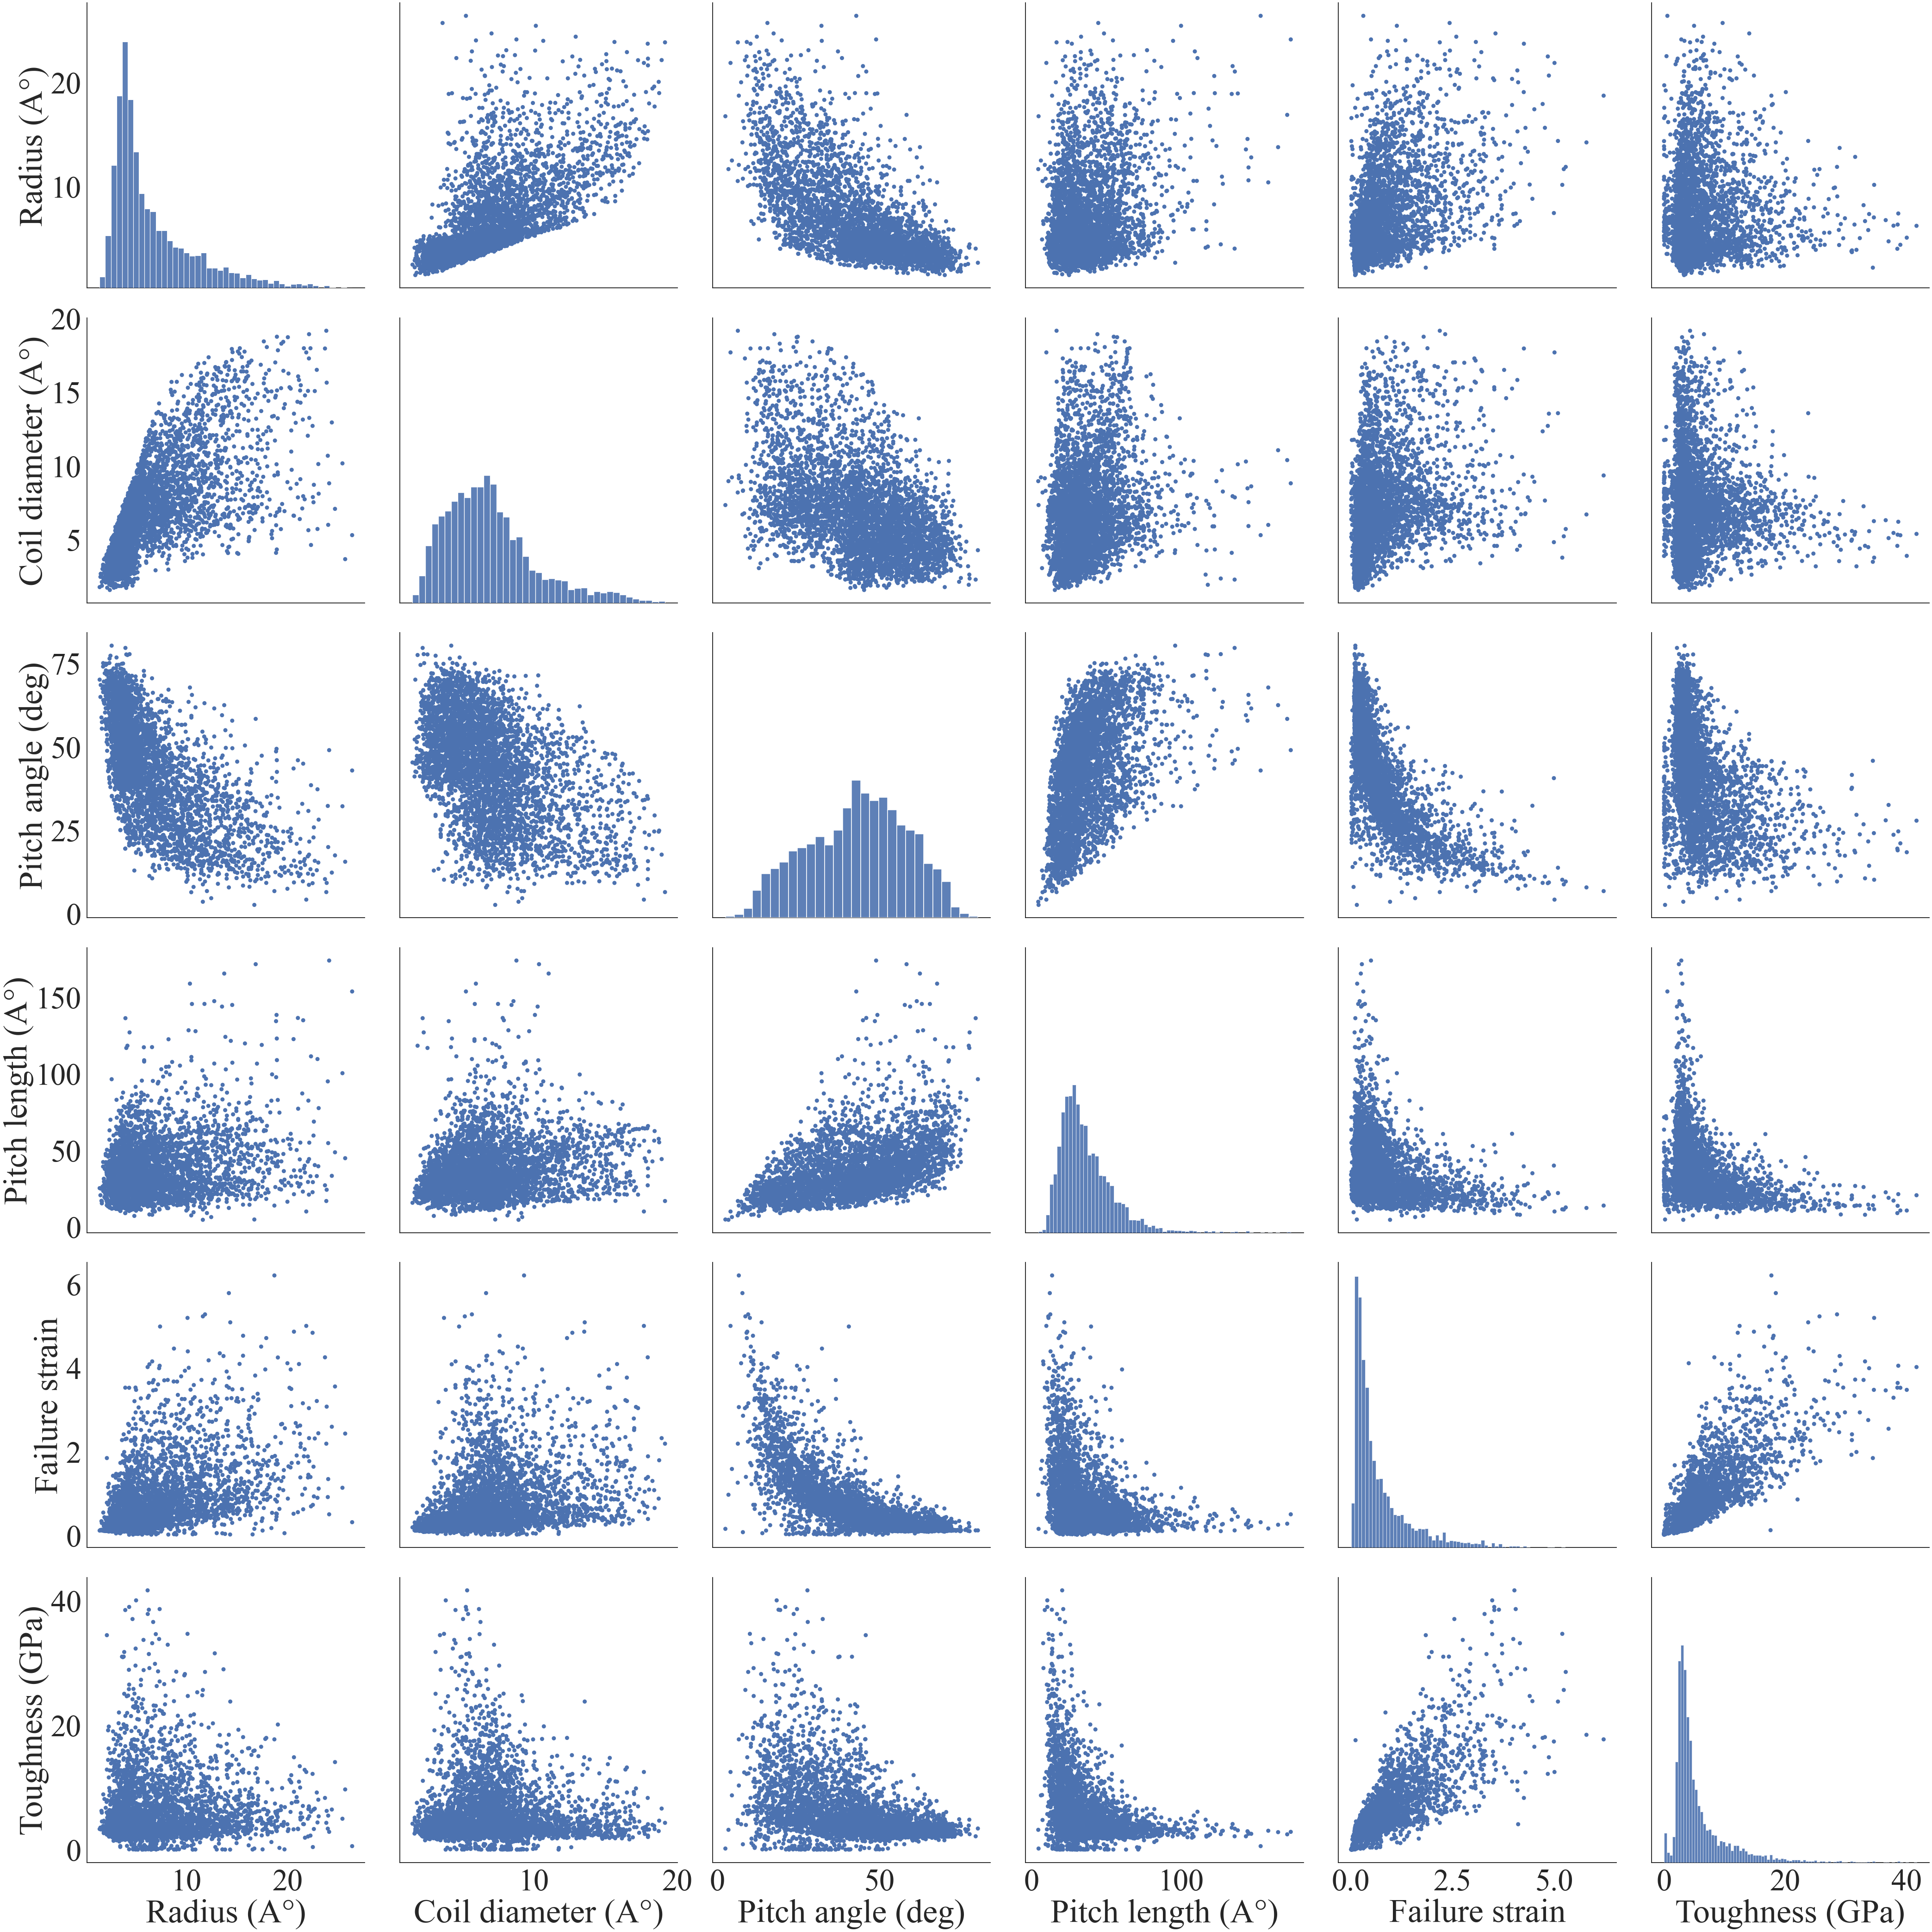

<Figure size 432x288 with 0 Axes>

In [33]:
sb.set(font="Times New Roman", style = 'white')
sb.set_context("talk", font_scale = 4)
sb.pairplot(vars = ['Radius (A°)', 'Coil diameter (A°)', 'Pitch angle (deg)', 'Pitch length (A°)', 'Failure strain', 'Toughness (GPa)'],
             data = dataset,
             kind = 'scatter',
             diag_kind = "hist",
             diag_kws = {'alpha':.9},
            height = 10,
            aspect = 1,
            plot_kws=dict(edgecolor="none"))

plt.show()
plt.clf()

## Correlation matrix

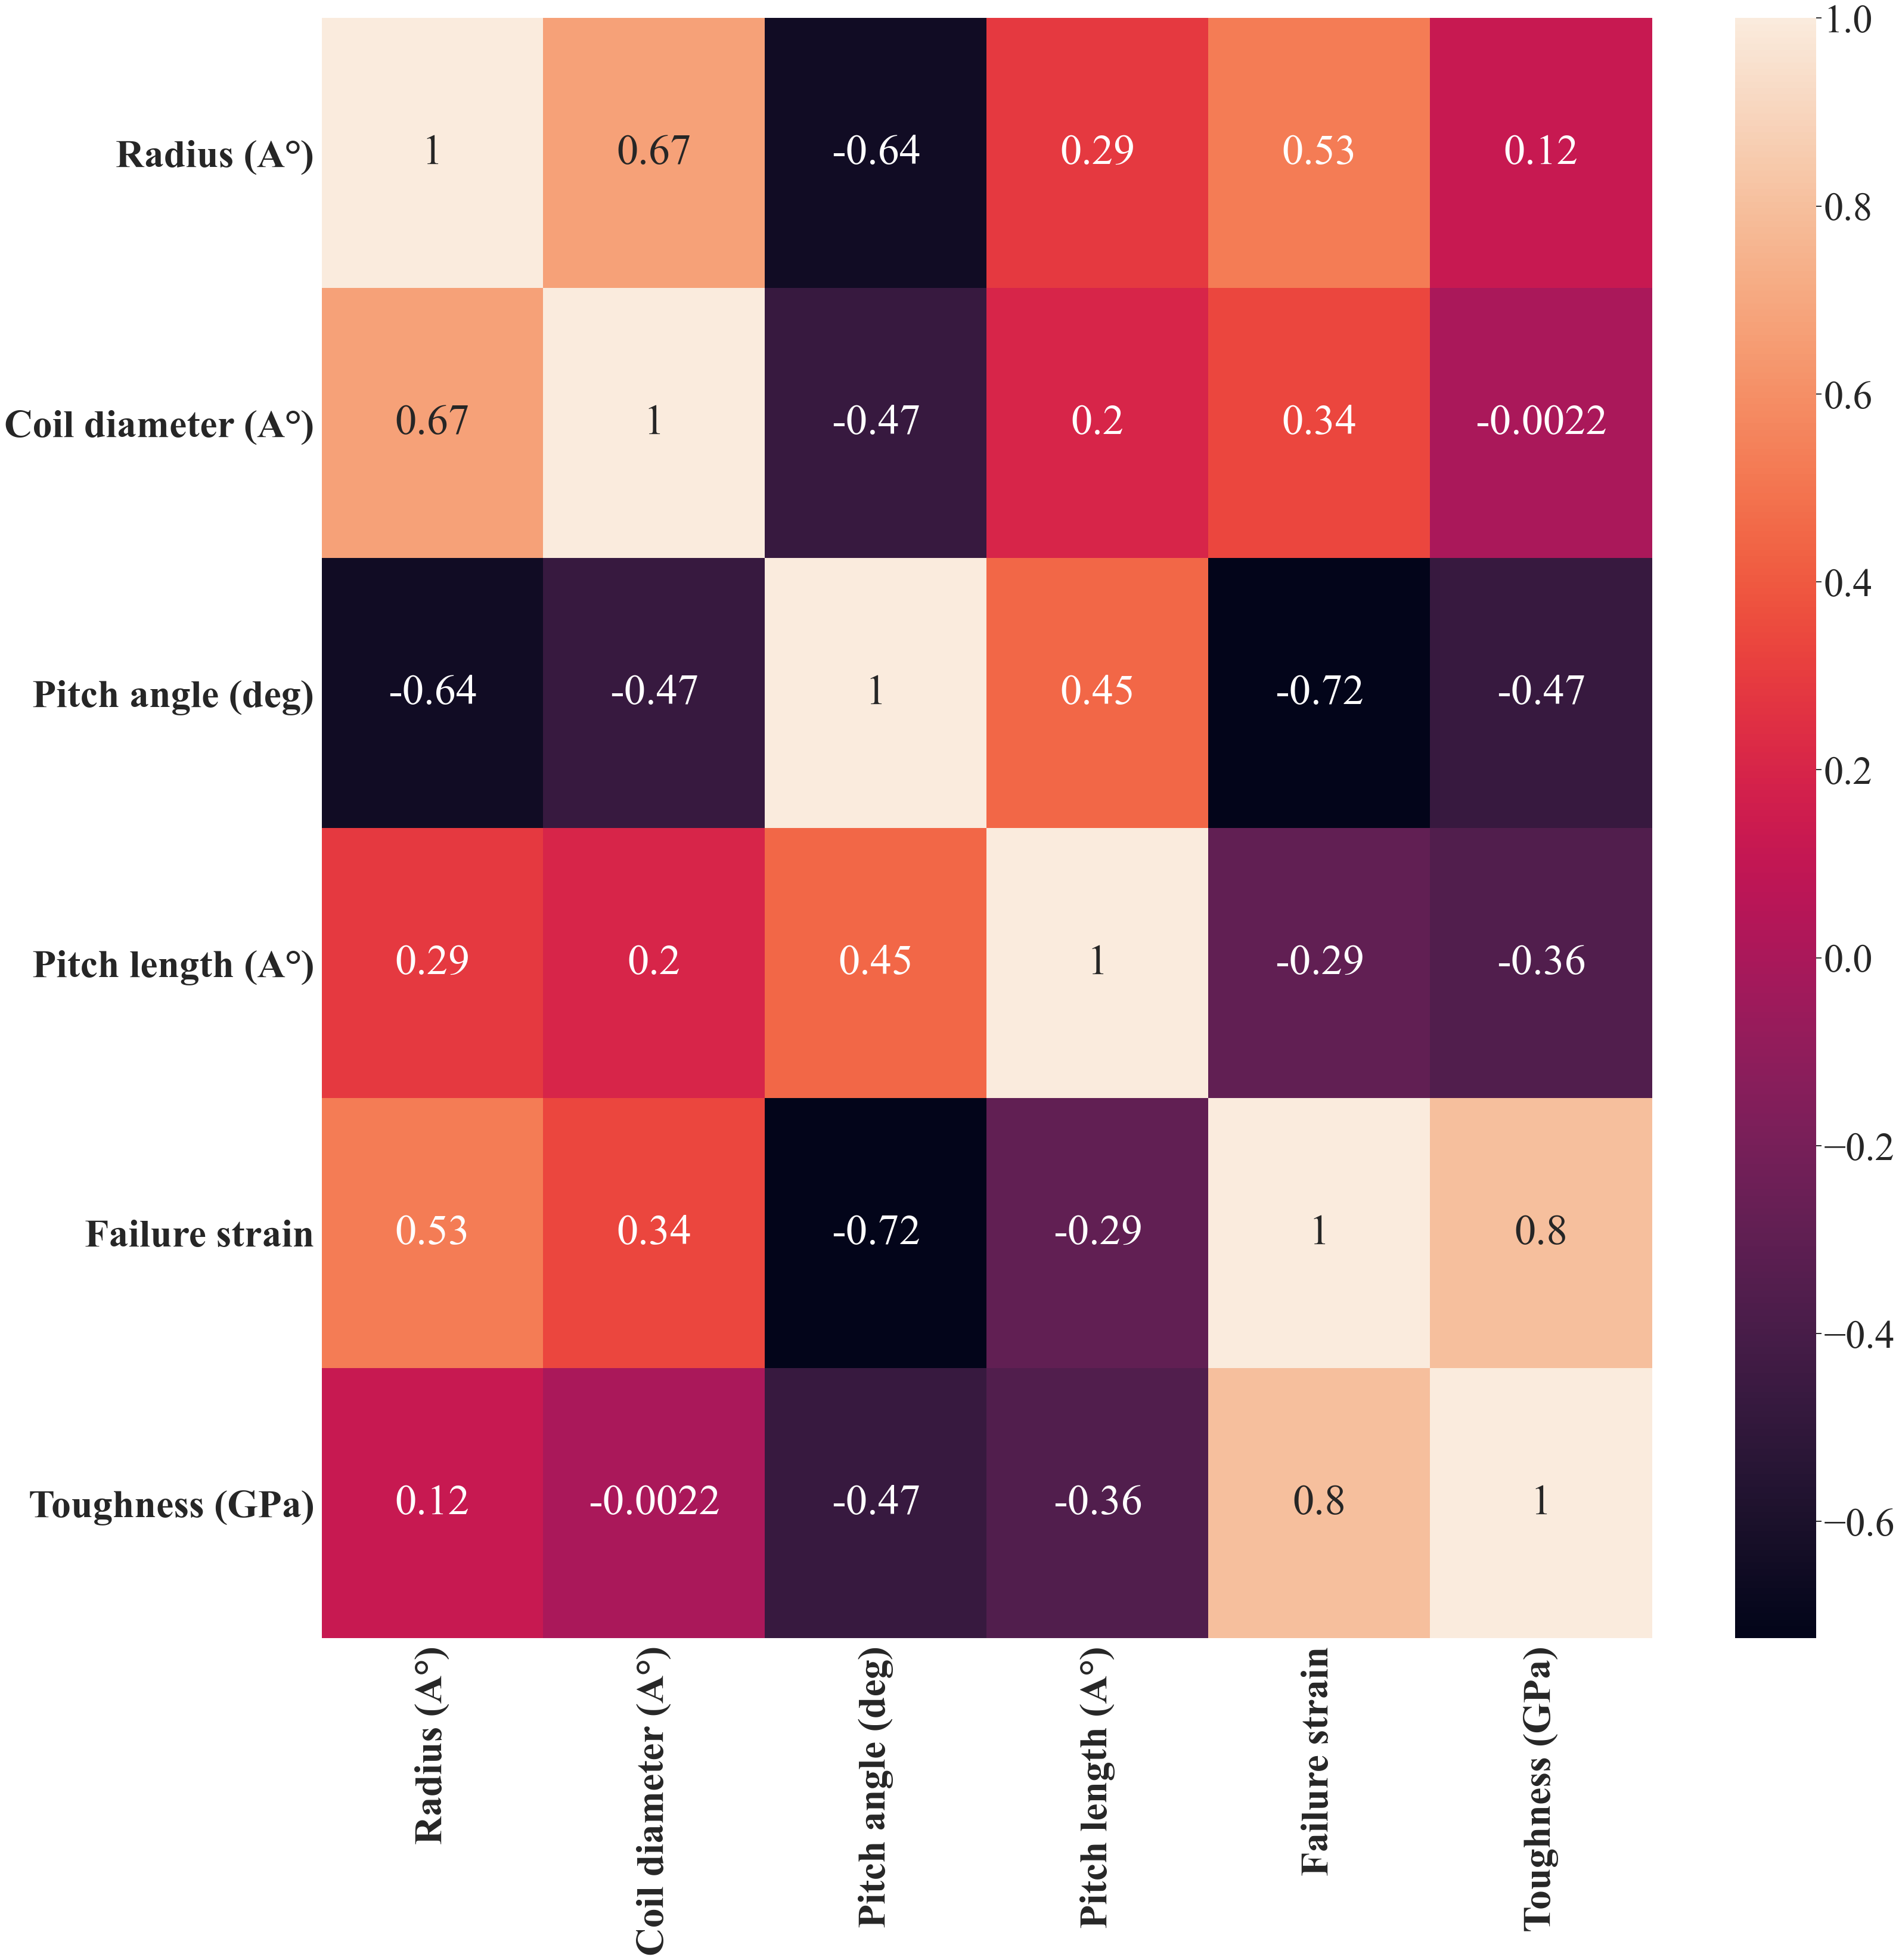

In [35]:
plt.figure(figsize=(50,50))
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold' )
dataset_trunc = dataset[['Radius (A°)', 'Coil diameter (A°)', 'Pitch angle (deg)', 'Pitch length (A°)', 'Failure strain', 'Toughness (GPa)']]
correlation_mat = dataset_trunc.corr()

sb.heatmap(correlation_mat, annot = True)


plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.824, 0.152, 0.021, 0.003])

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 41)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=41, verbose=0, warm_start=False)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=3,suppress=True)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.863 1.363]
 [2.167 2.838]
 [2.157 1.617]
 ...
 [1.82  1.444]
 [0.234 0.23 ]
 [0.325 0.14 ]]


In [ ]:
y_pred_train = regressor.predict(X_train)
np.set_printoptions(precision=3,suppress=True)
print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_train.reshape(len(y_train),1)),1))

[[0.429 0.426]
 [0.376 0.44 ]
 [1.274 1.355]
 ...
 [0.318 0.266]
 [2.546 2.792]
 [0.111 0.086]]


## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.23423501207028788

In [ ]:
mean_squared_error(y_train, y_pred_train)

0.030168186931237594

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6200093335907881

In [ ]:
r2_score(y_train, y_pred_train)

0.9527458708093155

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Feature importance

### 1. Default Scikit-learn’s feature importance

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = regressor.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regressor.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

In [ ]:
feature_names = list(dataset.columns)[:4]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 2. Permutation Importance using default sklean

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    regressor, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### 3. Permutation Importance using rfpimp Lib

In [ ]:
pip install rfpimp

In [ ]:
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, regressor.predict(X_train))

perm_imp_rfpimp = permutation_importances(regressor, X_train, y_train, r2)

In [ ]:
fig, ax = plt.subplots()
perm_imp_rfpimp.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()